# **Analysis of the data**

## **Preliminary steps**

In [1]:
### PACKAGES

import pandas as pd
import numpy as np

In [2]:
### FUNCTIONS

from src.libs import preprocessing, visualization

from src.configs import names, constants

In [3]:
pd.set_option("display.max_columns", None)

## **RAW DATA**

In [4]:
### LOAD DATA

df_gpt = preprocessing.load_dataset(source="GPT", type="STORY")
df_bard = preprocessing.load_dataset(source="BARD", type="STORY")
df_human = preprocessing.load_dataset(source="Human", type="STORY")

Time taken to load dataset: 0.020058631896972656 seconds
Time taken to load dataset: 0.011545419692993164 seconds
Time taken to load dataset: 0.008525609970092773 seconds


In [5]:
### GET TRAIN SPLIT

df_train_gpt, _ = preprocessing.train_valid_split(df_gpt)
df_train_bard, _ = preprocessing.train_valid_split(df_bard)
df_train_human, _ = preprocessing.train_valid_split(df_human)

In [6]:
### CHECK SHAPES

print(f"Shape of the GPT train set : {df_train_gpt.shape}")
print(f"Shape of the BARD train set : {df_train_bard.shape}")
print(f"Shape of the HUMAN train set : {df_train_human.shape}")

Shape of the GPT train set : (85, 3)
Shape of the BARD train set : (270, 2)
Shape of the HUMAN train set : (162, 16)


In [7]:
### CHECK STRUCTURE - GPT

df_train_gpt.sample(n=5)

,index,Title,Chapter_text
28,28,Tryst of Bithynian Bliss,The sound of Julius Caesar's boots echoed thro...
19,19,ChatGPT Generated Fanfiction,Chapter Text\nSpider-Man was swinging through ...
39,39,A Story About Coffee Beans,Once there lived a group of magical coffee bea...
59,59,Passion's Tempest: A Love Story in Ng Palace.,Chapter Text\nThe busy capital of Enngstan was...
36,36,Neon Genesis chat GPT,Chapter Text\nShinji IkariVerse 1:In a world o...


In [8]:
### CHECK STRUCTURE - BARD

df_train_bard.sample(n=5)

,prompts,BARD
283,Tell the story of a group of friends who stumb...,"\r\nThe four friends, Anya, Ben, Chris, and Da..."
73,Write a story about a character who can commun...,"\r\nSure, here is a story about a character wh..."
164,Tell the story of a group of explorers who stu...,\r\nThe Hidden City\r\n\r\nThe year is 2042. A...
132,Imagine a world where people can manipulate th...,\r\nThe World of Elemental Dance\r\n\r\nThe ye...
258,Write a story about a character who can contro...,\r\nThe year is 2042. The world has changed dr...


In [9]:
### CHECK STRUCTURE - HUMAN

df_train_human.sample(n=5)

,Title,Author,Fandoms,Required_tags,Datetime,Tags,ChatGPT_Tag,Summary,Language,Words,Chapters,Comments,Kudos,Bookmarks,Hits,Chapter_text
144,The Three Artifacts of the Demon World,Kikuta_Hirari,"Dance with Devils (Anime), Dance with Devils (...",[],23 Mar 2023,"['Graphic Depictions Of Violence', 'Kaginuki R...",No,"A slightly alternative ending to the anime, an...",English,854,1/?,NaN,NaN,NaN,3,Chapter Text\r\nThe bell struck the first of t...
89,Your eulogy.,KatBkgDynamite (ShardsOMemory),僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,[],23 Mar 2023,"['Graphic Depictions Of Violence', 'Major Char...",No,Eulogy;a speech or piece of writing that prais...,English,626,1/1,NaN,4.0,1.0,49,"He did it. Izuku won. He won, he thought as he..."
121,"I'm here, little brother",duarsafin,Young Royals (TV 2021),[],23 Mar 2023,"['Creator Chose Not To Use Archive Warnings', ...",No,Wille is sick with a fever and Erik takes care...,English,650,1/1,1.0,6.0,1.0,104,He’s sweating but he feels very cold. Grabbing...
102,Tangle in Elden Ring/The First Emerald,SuperBadAtUsernames,"Elden Ring (Video Game), Sonic the Hedgehog - ...",[],23 Mar 2023,"['Creator Chose Not To Use Archive Warnings', ...",No,A certain lemur discovers the location of a ch...,English,852,1/1,NaN,NaN,NaN,3,"At a large, stone pathway in Limgrave- not too..."
56,The pain of a beloved,A_Sleep_Deprived_Author,Lifesteal SMP,[],23 Mar 2023,"['Major Character Death', 'Ivory | IvoryCello ...",No,"Branzy is Just another person, and clown is a ...",English,891,1/?,1.0,2.0,NaN,6,Chapter Text\r\n\r\nChapter one:\r\n\r\nThanks...


In [10]:
df_train_human.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Title', 'Author', 'Fandoms', 'Required_tags', 'Datetime', 'Tags',
       'ChatGPT_Tag', 'Summary', 'Language', 'Words', 'Chapters', 'Comments',
       'Kudos', 'Bookmarks', 'Hits', 'Chapter_text'],
      dtype='object')>

In [11]:
### CHECK MISSING VALUES

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Missing values in {name} dataset :")
    print(df.isna().sum())
    print("\n")

Missing values in GPT dataset :
index           0
Title           0
Chapter_text    4
dtype: int64


Missing values in BARD dataset :
prompts    0
BARD       0
dtype: int64


Missing values in HUMAN dataset :
Title              0
Author             9
Fandoms            0
Required_tags      0
Datetime           0
Tags               0
ChatGPT_Tag        0
Summary            5
Language           0
Words              0
Chapters           0
Comments         135
Kudos             96
Bookmarks        141
Hits               0
Chapter_text       2
dtype: int64




In [12]:
### CHECK EMPTY TEXT

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Empty text in {name} dataset :")
    if name == "BARD":
        print(len(df[df["BARD"] == ""]))
    elif name == "GPT":
        print(len(df[df["Chapter_text"] == ""]))
    elif name == "HUMAN":
        print(len(df[df["Chapter_text"] == "\r\r\n"]))
    print("\n")

Empty text in GPT dataset :
0


Empty text in BARD dataset :
0


Empty text in HUMAN dataset :
0




In [13]:
### CHECK DUPLICATES

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Duplicate rows in {name} dataset :")
    print(df.duplicated().sum())
    print("\n")

Duplicate rows in GPT dataset :
0


Duplicate rows in BARD dataset :
0


Duplicate rows in HUMAN dataset :
3




## **CLEAN DATA**

In [14]:
### CLEAN AND CONCATENATE DATASETS

df_train = preprocessing.get_story_dataset(
    df_train_gpt, df_train_bard, df_train_human, samples_per_source=200
)

In [15]:
### CHECK

df_train.sample(10)

,text,abstract,label,type
29,"It hadn't always been like this. Once, upon a ...",Sick Eric has the ability to cure people of th...,0,story
282,(prompt: write an scene where its an argument ...,AI generated fanfic: The argument - a Breaking...,1,story
3,"Sure, here is a story set in a world where peo...",Imagine a world where people can manipulate th...,2,story
62,The sun was setting over the desolate landscap...,Fiery But Mostly Peaceful Drone Strike,1,story
144,The Time Lord Anya was a young woman who had a...,Write a story about a character who can contro...,2,story
231,"It was the end of the school year, and Nick an...",Heartstopper AI One-Shots,1,story
500,Fang dresses up in a pretty sundress that his ...,Fang dresses up in a pretty sundress.,0,story
462,The inquisitor sets down the headache-inducing...,N Corp Heathcliff downs a glass of cum. Please...,0,story
93,Chapter one: Thanks for the free kiss. Branzy ...,"Branzy is Just another person, and clown is a ...",0,story
269,Neil Josten couldn't believe his luck when he ...,Andrew Kisses Neil,1,story


In [16]:
### CHECK EMPTY TEXTS

df_train[df_train["text"] == ""]

,text,abstract,label,type


In [17]:
### CHECK SPLIT

df_train[names.LABEL].value_counts()

label
2    200
1    200
0    200
Name: count, dtype: int64

## **PLOTS**

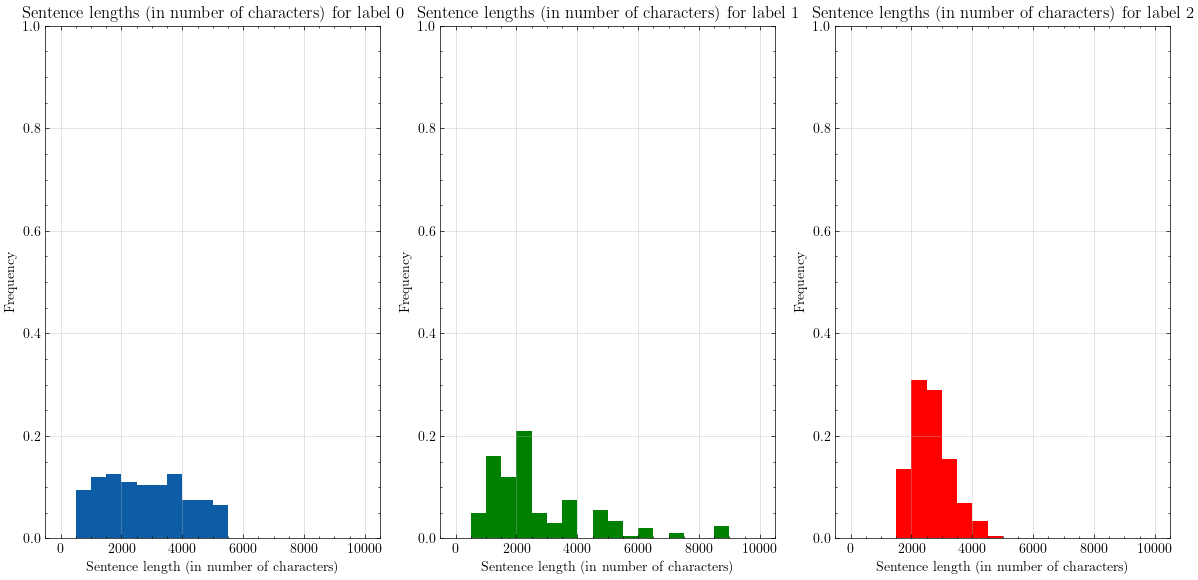

In [18]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (CHARACTERS)

sentence_lengths_chars = np.array(df_train[names.TEXT].str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_chars,
    labels=df_train[names.LABEL],
    type="characters",
)

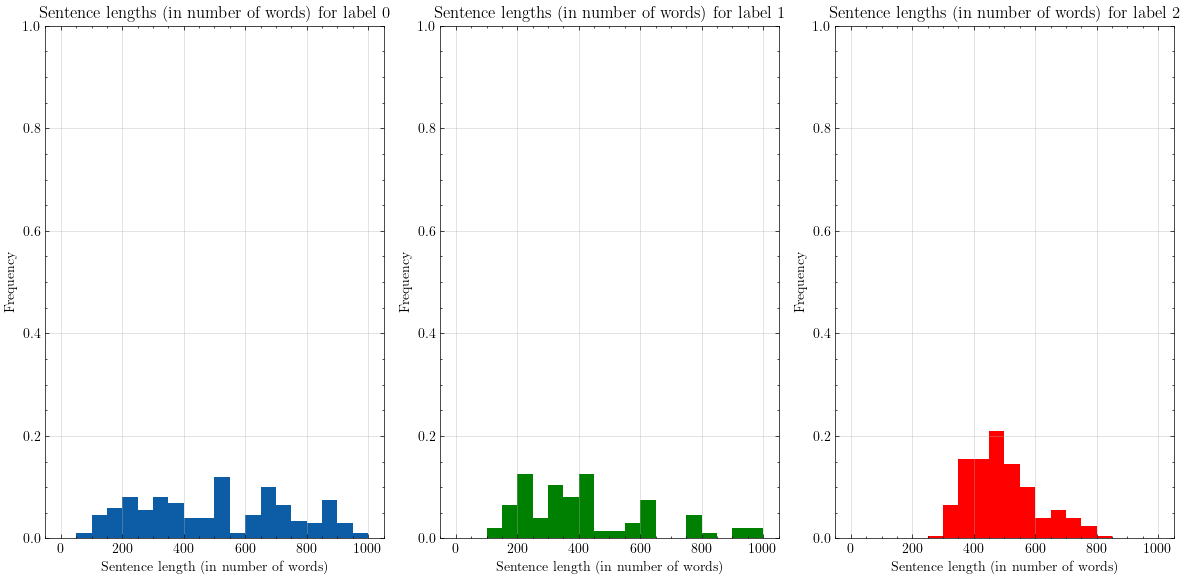

In [19]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (WORDS)

sentence_lengths_words = np.array(df_train[names.TEXT].str.split().str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_words, labels=df_train[names.LABEL], type="words"
)

In [20]:
### PLOT WORDCLOUD FOR EACH TEXT

texts = df_train[names.TEXT].to_numpy()
labels = df_train[names.LABEL].to_numpy()

visualization.plot_wordcloud_slider(texts=texts, labels=labels)

interactive(children=(IntSlider(value=0, description='ID', max=599), Output()), _dom_classes=('widget-interact…